In [31]:
# Install the ucimlrepo package to access the dataset and other packages needed
!pip install ucimlrepo
!pip install matplotlib seaborn

In [32]:
# Import necessary libraries
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Fetch the dataset using ucimlrepo
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

In [34]:
# Extract features and target from the dataset
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

In [35]:
# Initial Data Exploration
print(X.head())
print(X.info())

   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60 

In [36]:
# Data Normalization/Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
print(X.describe())  # Summarize statistics
print(X.isnull().sum())  # Check for missing values


          radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920    0.029560         

In [38]:
target_df = pd.DataFrame(y, columns=['diagnosis'])
print(target_df['diagnosis'].value_counts())

Series([], Name: count, dtype: int64)


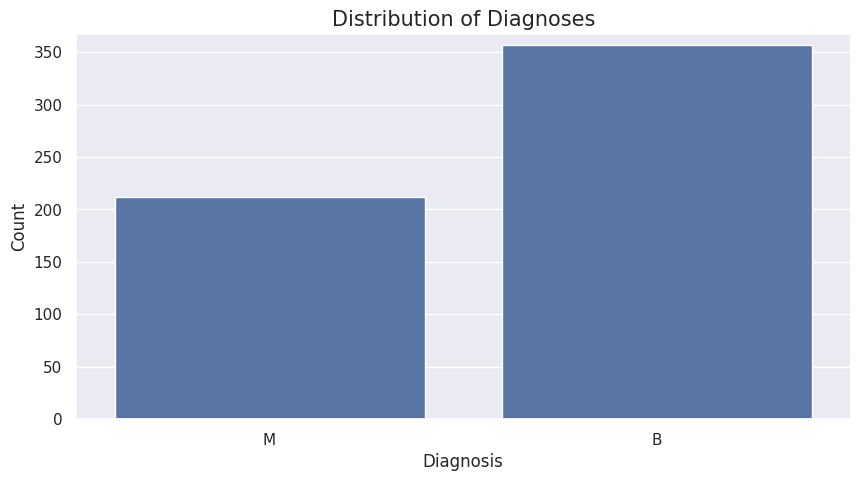

In [39]:
# Load the dataset from the CSV file
data_csv_path = '/data.csv' # download from
data_df = pd.read_csv(data_csv_path)

# Assuming the 'diagnosis' column is the target variable
# Create the target_df DataFrame
target_df = pd.DataFrame(data_df['diagnosis'], columns=['diagnosis'])
target_df['diagnosis'] = pd.Categorical(target_df['diagnosis'], categories=['M', 'B'])

# Now let's try to plot the countplot using the code from the notebook
plt.clf()  # Clear any existing plots
sns.set(rc={'figure.figsize':(10,5)})  # Set the figure size for seaborn plots
countplot = sns.countplot(x='diagnosis', data=target_df, order=['M', 'B'])  # Create the countplot
plt.title('Distribution of Diagnoses', fontsize=15)  # Title
plt.xlabel('Diagnosis', fontsize=12)  # X-axis label
plt.ylabel('Count', fontsize=12)  # Y-axis label
plt.ylim(0, target_df['diagnosis'].value_counts().max() + 10)  # Set the y-axis limits
plt.show()  # Display the plot

# Save the figure to a file
#plt.savefig('[your_path].png', dpi=300)

In [40]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [41]:
# Model Training
model = RandomForestClassifier()
model.fit(X_train, y_train)

<ipython-input-41-1c1cb6c6b029>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

In [43]:
# Advanced EDA - Correlation Analysis (Optional Step)
# Generate the correlation matrix
correlation_matrix = pd.DataFrame(X_scaled).corr()

In [44]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

<Figure size 1000x500 with 0 Axes>

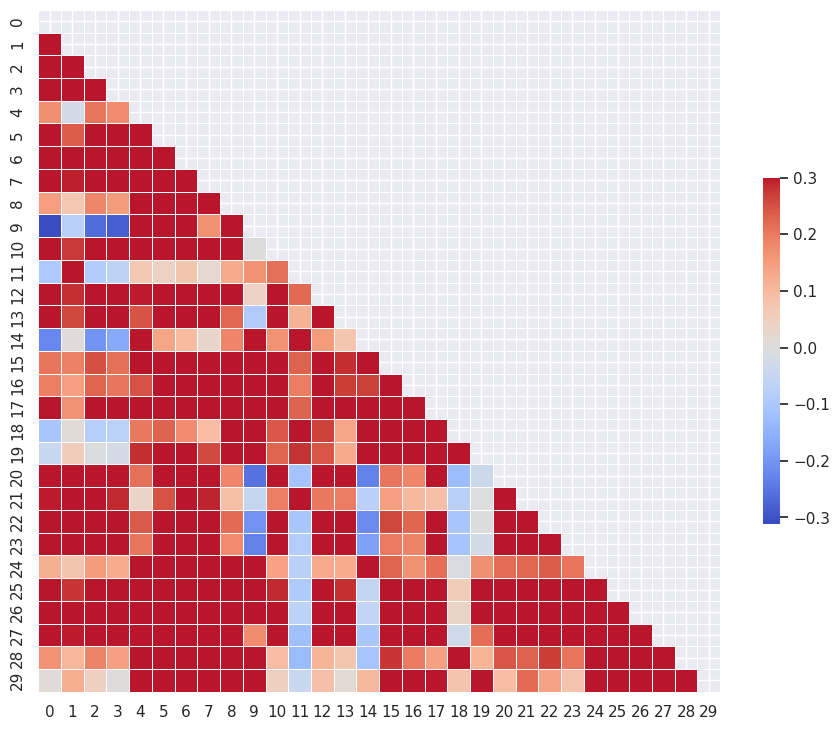

In [45]:
plt.clf()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

# Save the figure to a file
#plt.savefig('[your_path].png', dpi=300)

In [46]:
target_df = pd.read_csv(data_csv_path)
print(target_df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


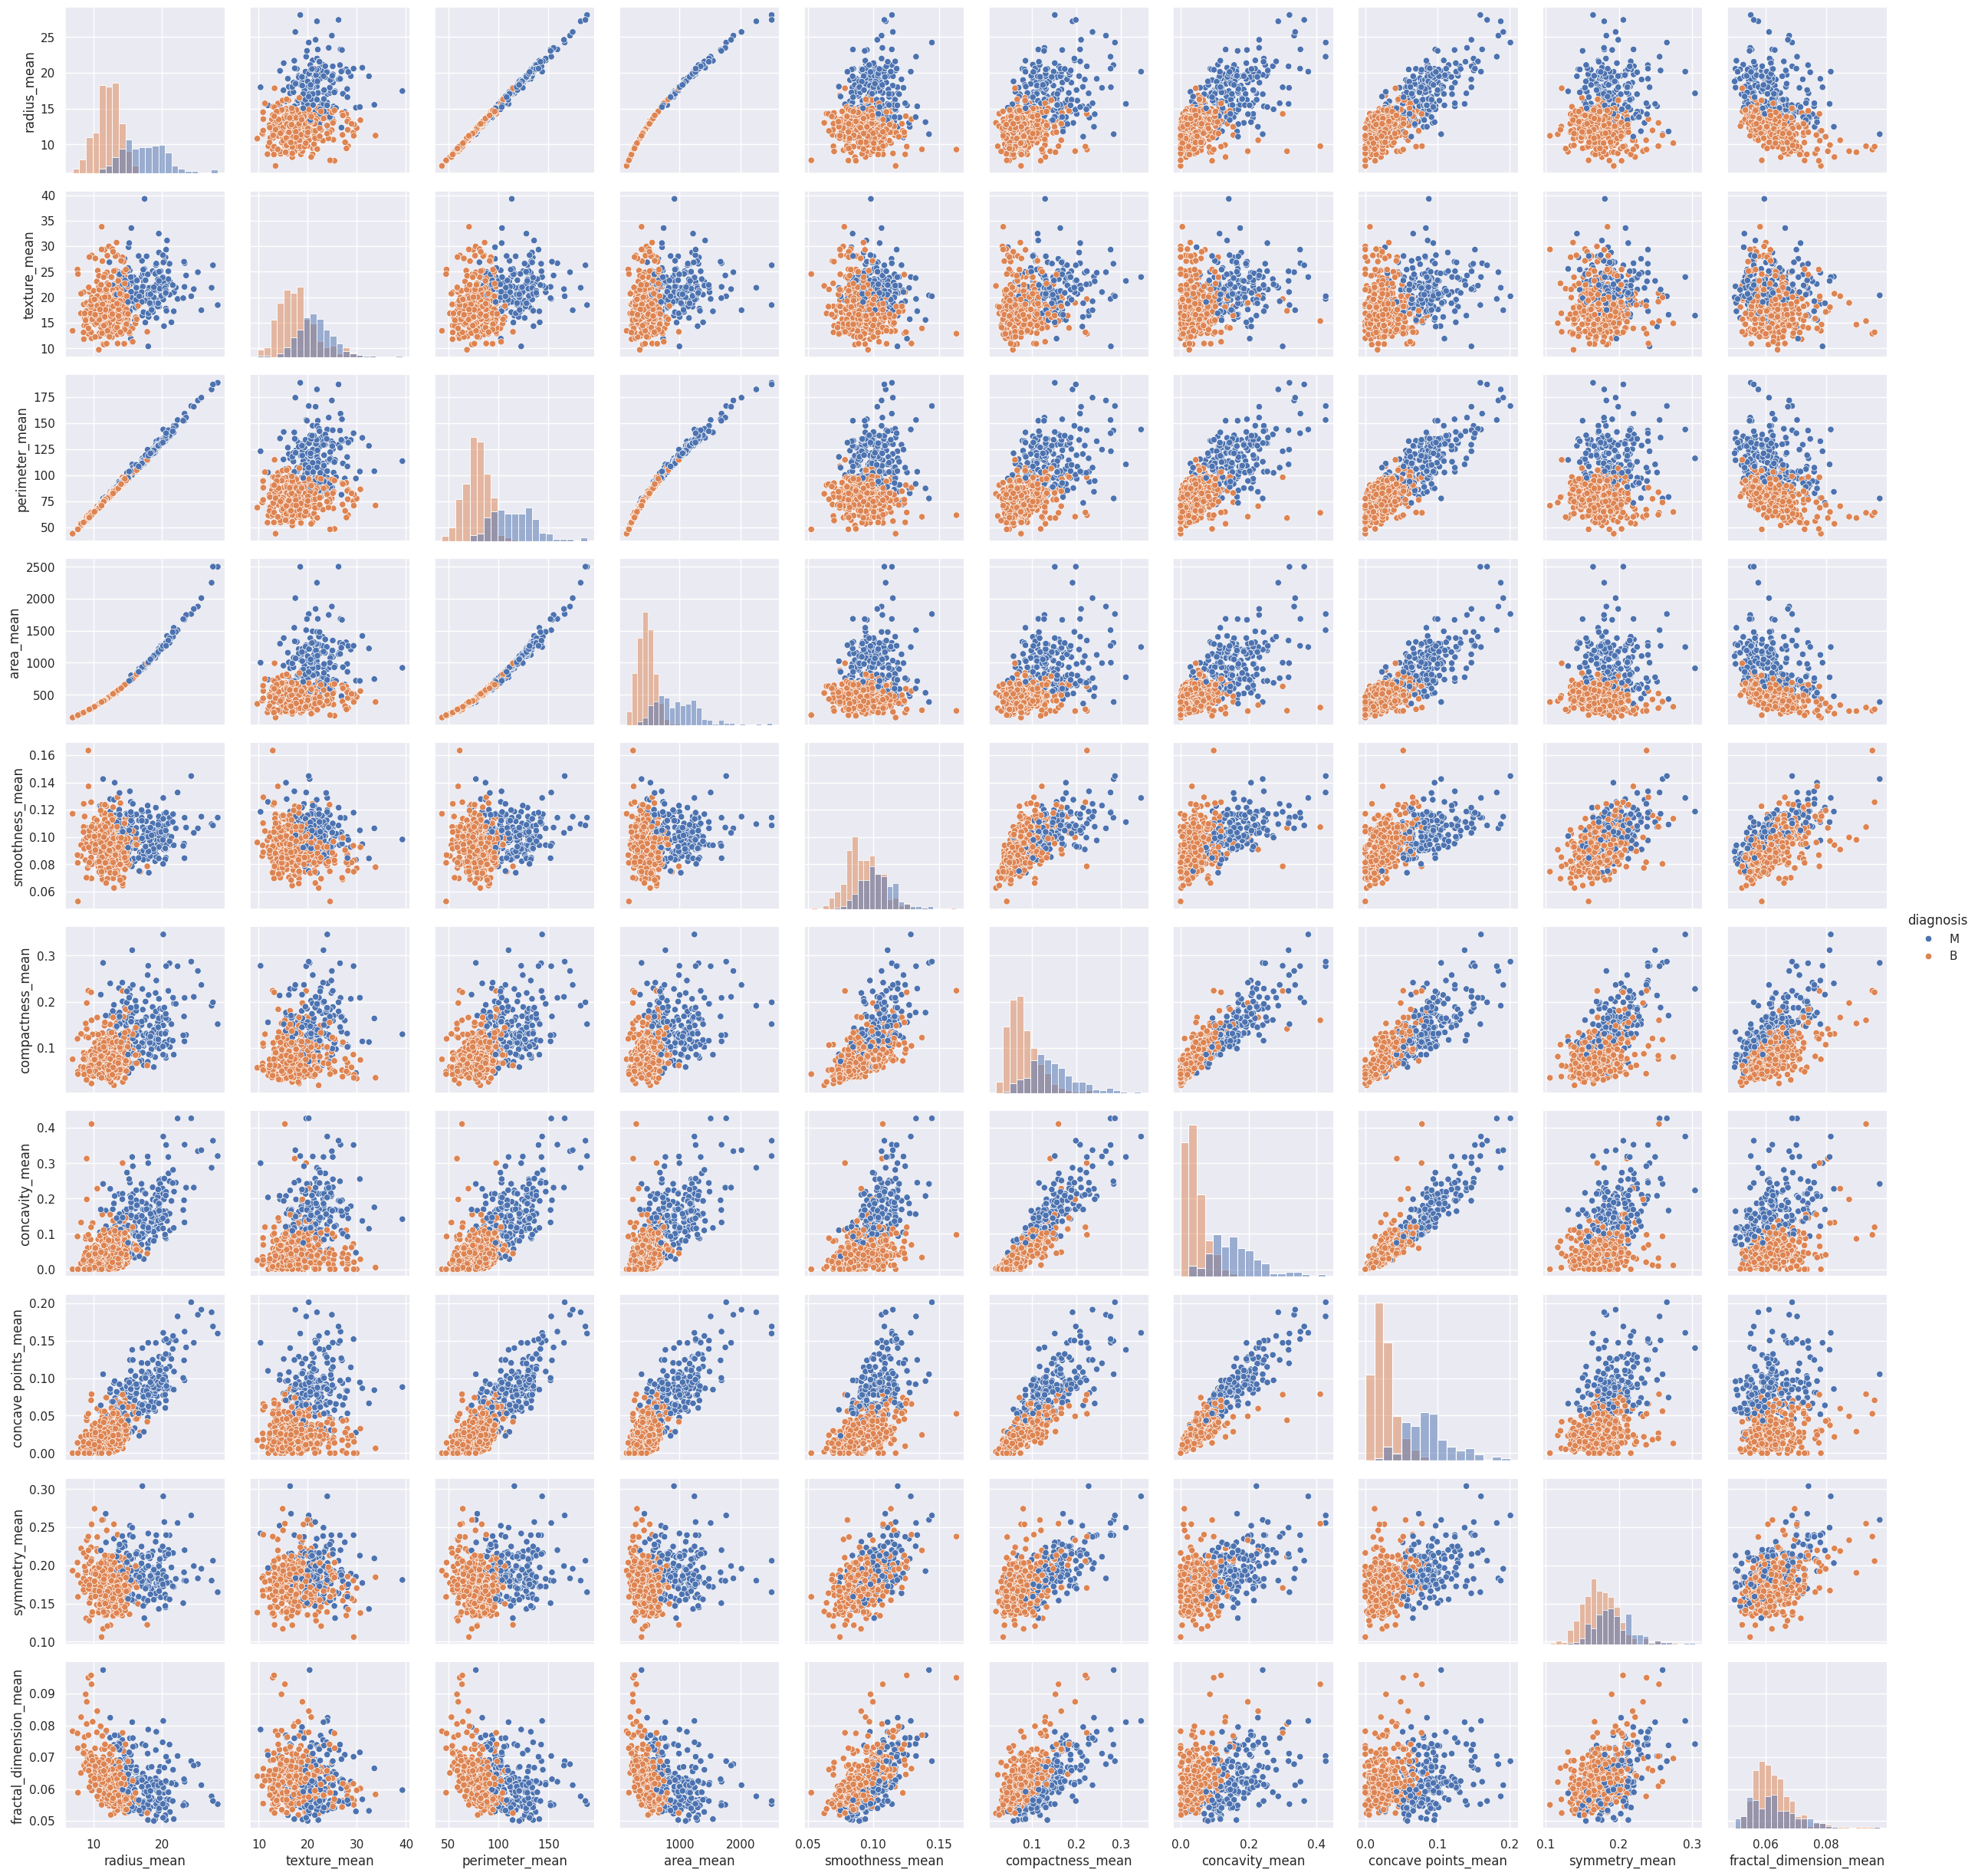

In [47]:
g = sns.PairGrid(target_df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                                            'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
                                            'symmetry_mean', 'fractal_dimension_mean'])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

plt.show()

# Save the figure to a file
#plt.savefig('[your_path].png', dpi=300)

In [48]:
df = target_df

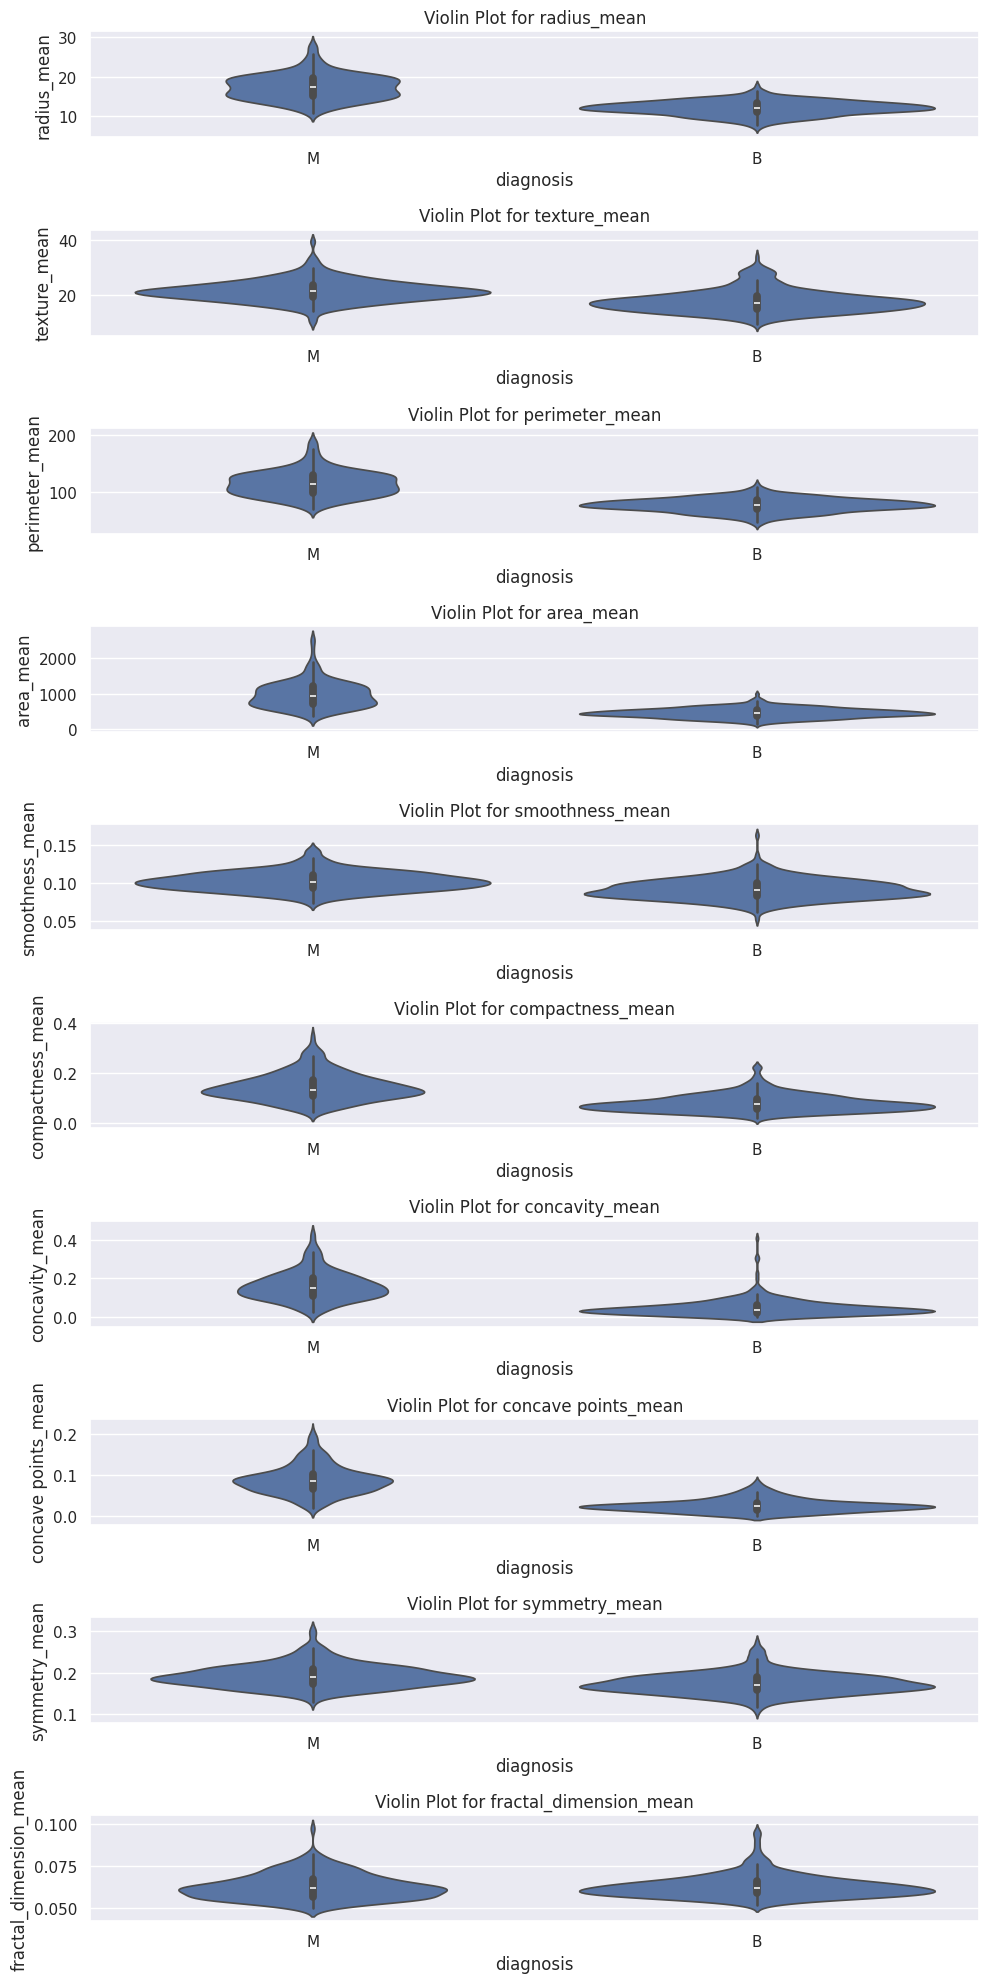

In [52]:
# List all feature names you want to plot (excluding 'diagnosis')
# List of features names to plot
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
                    'symmetry_mean', 'fractal_dimension_mean']

# Set up the matplotlib figure
plt.figure(figsize=(10, 2 * len(features_to_plot))) # Adjust figure size as needed

# Generate a violin plot for each feature
for i, feature in enumerate(features_to_plot):
    plt.subplot(len(features_to_plot), 1, i + 1)
    sns.violinplot(x='diagnosis', y=feature, data=df)
    plt.title(f'Violin Plot for {feature}')

# Adjust the layout
plt.tight_layout()

plt.show()

# Save the figure to a file
# plt.savefig('your_path.png', dpi=300)


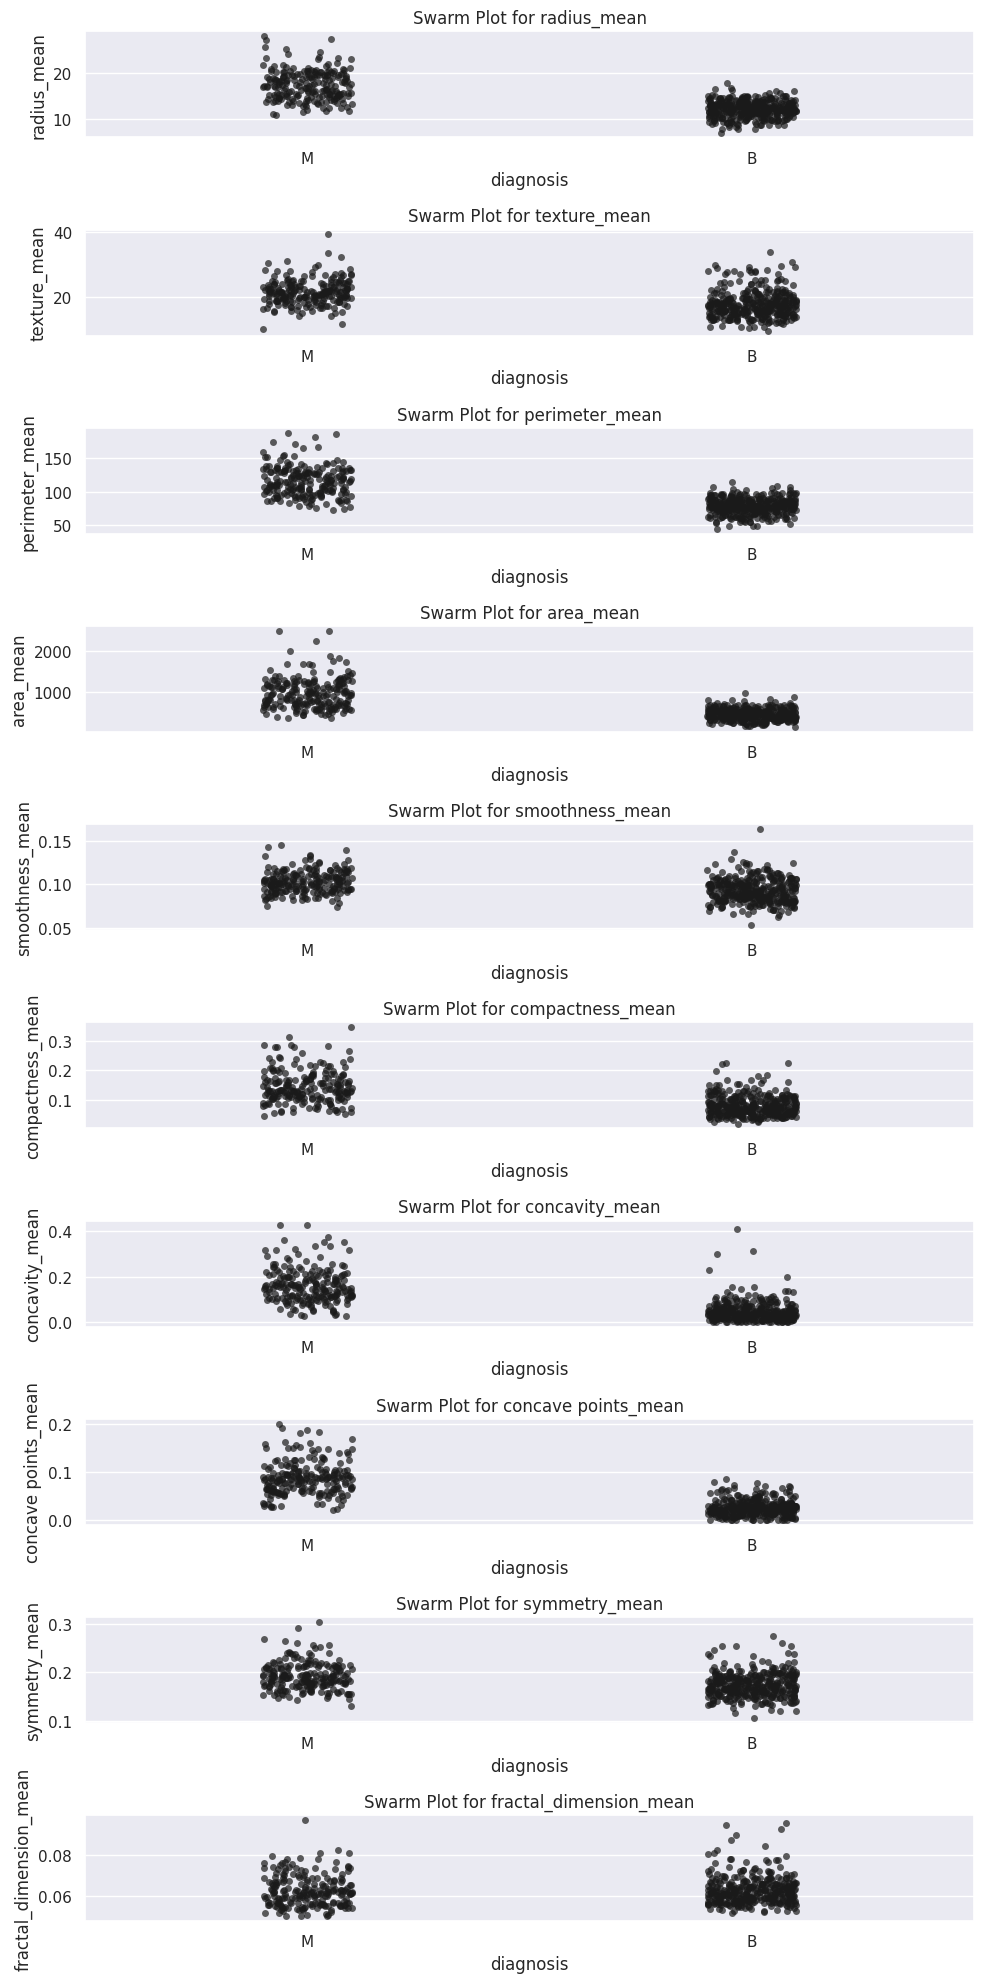

In [54]:
# List all feature names you want to plot (excluding 'diagnosis')
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
                    'symmetry_mean', 'fractal_dimension_mean'
]

# Set up the matplotlib figure
plt.figure(figsize=(10, 2 * len(features_to_plot)))  # Adjust figure size as needed

# Generate a swarm plot for each feature
for i, feature in enumerate(features_to_plot):
    plt.subplot(len(features_to_plot), 1, i + 1)
    sns.stripplot(x='diagnosis', y=feature, data=df, color='k', alpha=0.7)
    plt.title(f'Swarm Plot for {feature}')

# Adjust the layout
plt.tight_layout()

plt.show()

# Save the figure to a file
#plt.savefig('[your_path].png', dpi=300)

In [ ]:
# Model Evaluation
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))